In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sn
import cv2
from random import randint
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
train_dir = 'C:/Users/dilat/Downloads/clothes_data/clothes_data/train'
test_dir = 'C:/Users/dilat/Downloads/clothes_data/clothes_data/test'

In [3]:
def read_imgs_lbls(_dir):
    Images, Labels = [], []
    for root in os.listdir(_dir):
        f = os.path.join(_dir,f'{root}')       
        for file in os.listdir(f):
            image = cv2.imread(os.path.join(f,file))  
            image = cv2.resize(image,(128,128))       
            Images.append(image)
            Labels.append(root.split('_')[0])          
    Labels = pd.get_dummies(Labels).values
    Images = np.array(Images)
    return Images, Labels

In [4]:
train_images,train_labels = read_imgs_lbls(train_dir)
test_images,test_labels = read_imgs_lbls(test_dir)

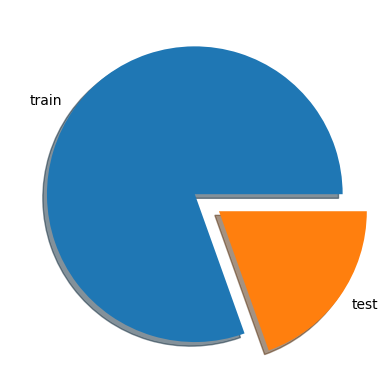

In [5]:
y = np.array([int(len(train_images)),int(len(test_images))])
mylabels = ['train','test']
myexplode = [0,0.2]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True)
plt.show() 

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, shuffle = True, test_size = 0.2, random_state = 58)

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import optimizers

In [8]:
kernel_size = 3    

In [9]:
batch_size = 16                               
iter_per_epoch = len(X_train) // batch_size   
val_per_epoch = len(X_val) // batch_size     

In [13]:
model = Sequential()

model.add(Conv2D(batch_size, (kernel_size, kernel_size), activation='relu', input_shape=(128, 128, 3), padding = "same")),
model.add(MaxPooling2D(4, 4)),
model.add(Conv2D(2*batch_size, (kernel_size, kernel_size), activation='relu', padding = "same")),
model.add(MaxPooling2D(3,3)),
model.add(Dropout(rate=0.20)),
model.add(Conv2D(4*batch_size, (kernel_size, kernel_size), activation='relu', padding = "same")),
model.add(MaxPooling2D(pool_size= (2, 2), strides= (2, 2)))
model.add(Flatten()),
          
model.add(Dense(128, activation='relu')),
model.add(Dense(8, activation='softmax'))

model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 10, 10, 32)       0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 10, 10, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 64)       

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(              
        rotation_range=25,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        horizontal_flip=True
        )
val_datagen = ImageDataGenerator()      

In [16]:
train_gen = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_gen = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [17]:
history = model.fit(X_train,y_train,epochs=64,batch_size=600,validation_data=(X_val,y_val))

Epoch 1/64
10/10 [==============================] - 22s 2s/step - loss: 38.7540 - accuracy: 0.1310 - val_loss: 4.0410 - val_accuracy: 0.1138
Epoch 2/64
10/10 [==============================] - 21s 2s/step - loss: 3.7672 - accuracy: 0.1751 - val_loss: 2.0952 - val_accuracy: 0.2034
Epoch 3/64
10/10 [==============================] - 22s 2s/step - loss: 2.0805 - accuracy: 0.1792 - val_loss: 2.0306 - val_accuracy: 0.1814
Epoch 4/64
10/10 [==============================] - 23s 2s/step - loss: 1.9943 - accuracy: 0.2100 - val_loss: 1.9837 - val_accuracy: 0.2304
Epoch 5/64
10/10 [==============================] - 23s 2s/step - loss: 1.9307 - accuracy: 0.2384 - val_loss: 1.9010 - val_accuracy: 0.2418
Epoch 6/64
10/10 [==============================] - 26s 3s/step - loss: 1.8488 - accuracy: 0.2703 - val_loss: 1.8025 - val_accuracy: 0.2710
Epoch 7/64
10/10 [==============================] - 24s 2s/step - loss: 1.7833 - accuracy: 0.2959 - val_loss: 1.7605 - val_accuracy: 0.2909
Epoch 8/64
10/10 [=

10/10 [==============================] - 25s 3s/step - loss: 0.5546 - accuracy: 0.8019 - val_loss: 1.2572 - val_accuracy: 0.6188
Epoch 60/64
10/10 [==============================] - 26s 2s/step - loss: 0.5500 - accuracy: 0.7964 - val_loss: 1.2438 - val_accuracy: 0.6152
Epoch 61/64
10/10 [==============================] - 24s 2s/step - loss: 0.5403 - accuracy: 0.8028 - val_loss: 1.2300 - val_accuracy: 0.6216
Epoch 62/64
10/10 [==============================] - 24s 2s/step - loss: 0.5367 - accuracy: 0.8048 - val_loss: 1.2349 - val_accuracy: 0.6138
Epoch 63/64
10/10 [==============================] - 24s 2s/step - loss: 0.5197 - accuracy: 0.8103 - val_loss: 1.2494 - val_accuracy: 0.6316
Epoch 64/64
10/10 [==============================] - 25s 3s/step - loss: 0.5051 - accuracy: 0.8197 - val_loss: 1.2343 - val_accuracy: 0.6337


In [18]:
score = model.evaluate_generator(val_gen, steps= len(val_gen))

for idx, metric in enumerate(model.metrics_names):
    print('{}:{}'.format(metric, score[idx]))

C:\Users\dilat\AppData\Local\Temp\ipykernel_9760\1188353174.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(val_gen, steps= len(val_gen))


loss:1.2342828512191772
accuracy:0.633712649345398


In [19]:
print('shape of images in test set: {} '.format(test_images.shape))

shape of images in test set: (1707, 128, 128, 3) 


In [20]:
predict = model.predict(test_images)

54/54 [==============================] - 2s 38ms/step


In [21]:
real_values = []
predicted_values = []
for test in test_labels:
    label_1 = np.argmax(test)
    real_values.append(label_1)
for pred in model.predict(test_images):
    label_2 = np.argmax(pred)
    predicted_values.append(label_2)
acc = accuracy_score(real_values,predicted_values)

54/54 [==============================] - 2s 38ms/step


In [22]:
print("accuracy score is : %",100*acc)

accuracy score is : % 58.05506736965437


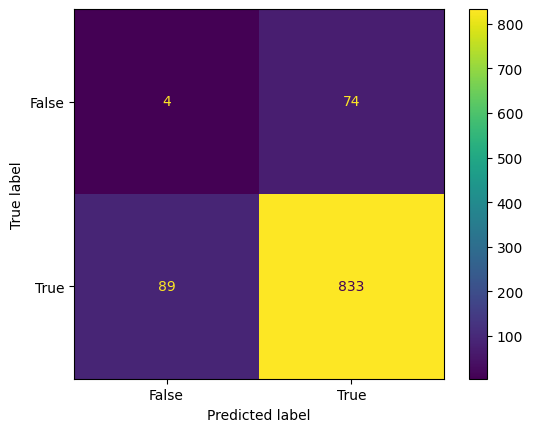

In [23]:
from sklearn import metrics

real_values = np.random.binomial(1,.9,size = 1000)
predicted_values = np.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(real_values, predicted_values)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [24]:
from tqdm import tqdm
class_names = ['elbise','gomlek', 'kazak', 'mont', 'pantolon', 'sort', 'tayt', 'tisort']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (227, 227)

In [25]:
def display_random_image(class_names, images, labels):
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Predicte Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

54/54 [==============================] - 2s 38ms/step


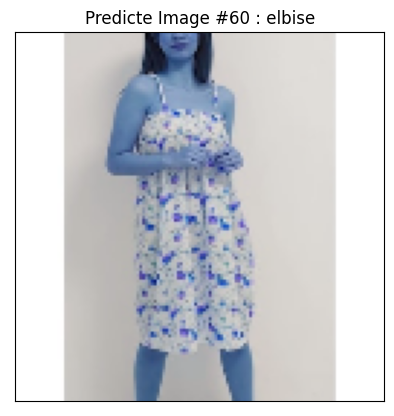

In [26]:
predictions = model.predict(test_images)     
pred_labels = np.argmax(predictions, axis = 1)

display_random_image(class_names, test_images, pred_labels)